In [2]:
import numpy as np
import copy
import rebound
import matplotlib.pyplot as plt

# rebound 长度单位为日地距离（AU）
# rebound step迭代周期短语integrate，约299steps为一年

In [4]:
%matplotlib inline

In [33]:
sim = rebound.Simulation()
sim.add("Sun")
#sim.add("Earth")
sim.add(["Mercury", "Venus", "Earth", "Mars"])
#sim.status()
#sim.integrate(100)
#rebound.OrbitPlot(sim, projection="xy")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')


In [208]:
print(sim.particles[3].x ** 2 + sim.particles[3].y ** 2 + sim.particles[3].z ** 2)

0.9965379395327311


In [16]:
tilt = 23.5047/180*np.pi
print(tilt)

0.41023440469351113


In [50]:
#initialization
sun_earth = rebound.Simulation()
sun_earth.add("Sun")
sun_earth.add("Earth")
sun_earth.add("Neptune")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')


In [68]:
steps = 300
coordinates = simulate(simulator=sun_earth, steps=steps, time=105471.5719063,
                       central=1, targets=[2], axis=np.array([np.sin(tilt), 0.0, np.cos(tilt)]),
                       omega=7.2921150e-5, phase1=0, phase2=np.pi/4.0, r=4.2634965e-5)
# r = 6.3781e6 / 149597870700 = 4.2634965e-5 au

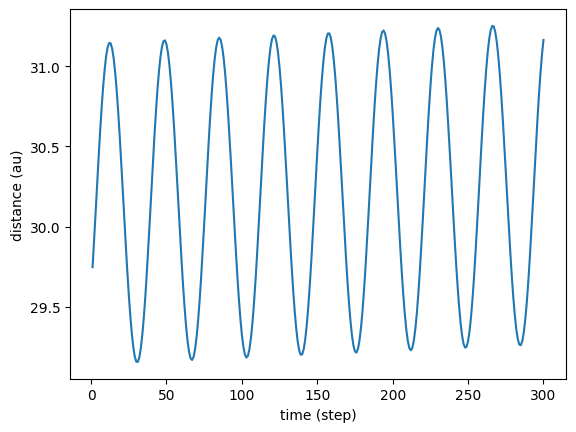

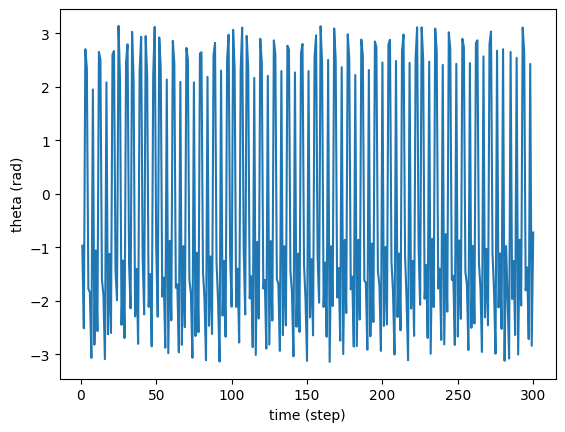

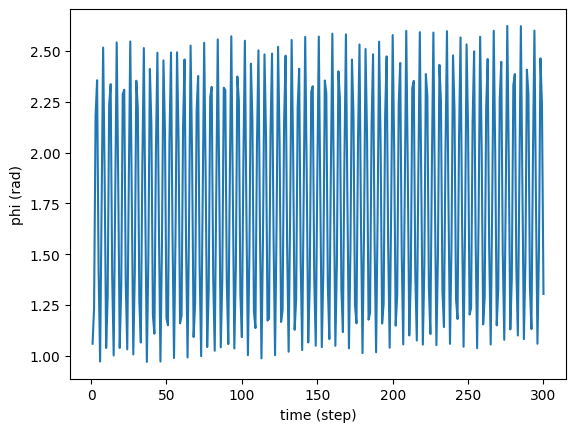

In [69]:
time_span = np.arange(1, steps+1)
plt.plot(time_span, coordinates[:,0,0])
plt.xlabel("time (step)")
plt.ylabel("distance (au)")
plt.show()
plt.plot(time_span, coordinates[:,0,1])
plt.xlabel("time (step)")
plt.ylabel("theta (rad)")
plt.show()
plt.plot(time_span, coordinates[:,0,2])
plt.xlabel("time (step)")
plt.ylabel("phi (rad)")
plt.show()

In [70]:
# venus
sun_earth2 = rebound.Simulation()
sun_earth2.add("Sun")
sun_earth2.add("Venus")
sun_earth2.add("Earth")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')


In [71]:
steps = 300
coordinates = simulate(simulator=sun_earth2, steps=steps, time=105471.5719063,
                       central=1, targets=[2], axis=np.array([np.sin(tilt), 0.0, np.cos(tilt)]),
                       omega=7.2921150e-5, phase1=0, phase2=np.pi/4.0, r=4.2634965e-5)
# r = 6.3781e6 / 149597870700 = 4.2634965e-5 au

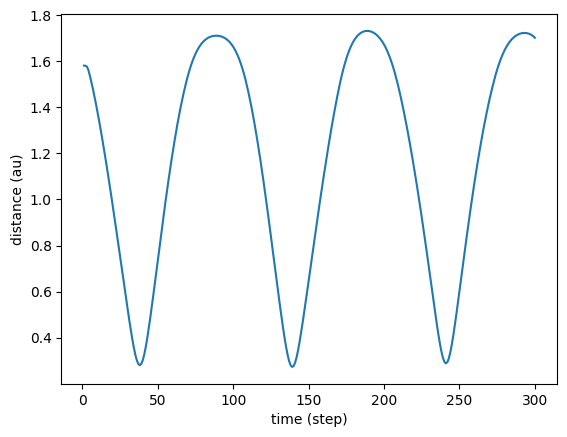

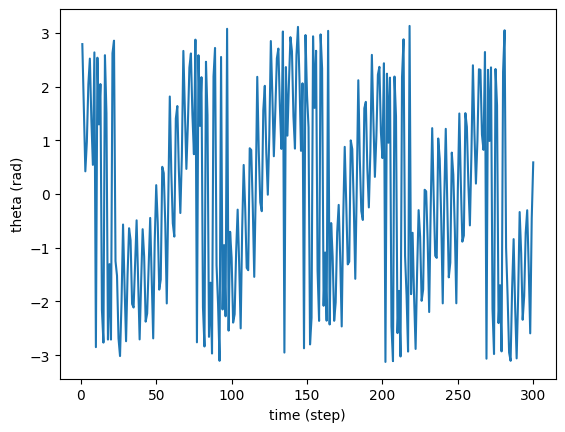

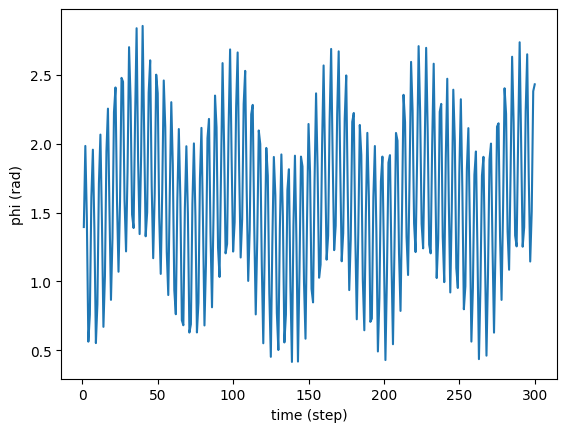

In [72]:
time_span = np.arange(1, steps+1)
plt.plot(time_span, coordinates[:,0,0])
plt.xlabel("time (step)")
plt.ylabel("distance (au)")
plt.show()
plt.plot(time_span, coordinates[:,0,1])
plt.xlabel("time (step)")
plt.ylabel("theta (rad)")
plt.show()
plt.plot(time_span, coordinates[:,0,2])
plt.xlabel("time (step)")
plt.ylabel("phi (rad)")
plt.show()

In [100]:
def show(earth):
    print(earth.x, earth.y, earth.z)
    print(earth.vx, earth.vy, earth.vz)
    print()
    #rebound.OrbitPlot(sim, projection="xy", color=True)

In [67]:
def z_rotation(axis, inv=False):
    # u = z cross axis
    # <0,0,1> cross <x,y,z>
    uv = np.array([-axis[1], axis[0], 0])
    if inv:
        uv = uv * -1
    uv = uv / np.sqrt((uv**2).sum()) # unit vector
    theta = np.arccos(axis[2]/np.sqrt((axis**2).sum()))
    
    rotational_matrix = [[uv[0]*uv[0]*(1-np.cos(theta)) + np.cos(theta), uv[0]*uv[1]*(1-np.cos(theta)) - uv[2]*np.sin(theta), uv[0]*uv[2]*(1-np.cos(theta)) + uv[1]*np.sin(theta)],
                         [uv[0]*uv[1]*(1-np.cos(theta)) + uv[2]*np.sin(theta), uv[1]*uv[1]*(1-np.cos(theta)) + np.cos(theta), uv[1]*uv[2]*(1-np.cos(theta)) - uv[0]*np.sin(theta)],
                         [uv[0]*uv[2]*(1-np.cos(theta)) - uv[1]*np.sin(theta), uv[1]*uv[2]*(1-np.cos(theta)) + uv[0]*np.sin(theta), uv[2]*uv[2]*(1-np.cos(theta)) + np.cos(theta)]]
    
    # return the rotational matrix
    return np.array(rotational_matrix)
    
    '''
    rotational_matrix = [[uv[0]**2*(1-np.cos(theta)) + np.cos(theta), uv[0]*uv[1]*(1-np.cos(theta)), uv[1]*np.sin(theta)],
                         [uv[0]*uv[1]*(1-np.cos(theta)), uv[1]**2*(1-np.cos(theta)) + np.cos(theta), -uv[0]*np.sin(theta)],
                         [-uv[1]*np.sin(theta), uv[0]*np.sin(theta), np.cos(theta)]]
    
    result = []
    for i in range(3):
        c = 0
        for j in range(3):
            c += rotational_matrix[i][j] * relative_coor[j]
        result.append(c)
        
    return np.array(result)
    
    '''
    
    
def simulate(simulator, steps, time, central, targets, axis, omega, phase1=0, phase2=np.pi/2.0, r=1.0):
    # steps: number of simulation steps
    # time: time length of one step
    # central: index of "central" planet
    # targets: list of index of target planets
    # axis: rotational axis of "central" planet
    # omega: angular velocity of "central" planet
    # phase1: theta in spherical coordinates, longitude
    # phase2: phi in spherical coordinates, latitude
    # r: radius of "central planet"
    coordinates = [] # list of relative coordinates of each target planet in each step
    for i in range(steps):
        simulator.step()
        phase1 += (omega * time) % (2*np.pi)
        
        relative_x = r * np.cos(phase1) * np.sin(phase2)
        relative_y = r * np.sin(phase1) * np.sin(phase2)
        relative_z = r * np.cos(phase2)        
        #relative_rotation = rotation(axis)
        
        z_to_axis = z_rotation(axis)
        #print(z_to_axis)
        relative_k = np.array([relative_x, relative_y, relative_z])
        relative_j = np.array([-relative_x * np.sin(phase2) / r, -relative_y * np.sin(phase2) / r, np.tan(phase2) - relative_z * np.sin(phase2)/r])
        abs_k = []
        abs_j = []
        for i in range(3):
            c1 = 0
            c2 = 0
            for j in range(3):
                c1 += z_to_axis[i][j] * relative_k[j]
                c2 += z_to_axis[i][j] * relative_j[j]
            abs_k.append(c1)
            abs_j.append(c2)
        abs_k = np.array(abs_k)
        abs_j = np.array(abs_j)
        
        # 从abs_k, abs_j转回xyz，与遥远坐标相乘得到坐标在切面坐标系里的表示
        # abs_k -> z, rotated_j -> y
        abs_k_to_z = z_rotation(abs_k, inv=True)
        rotated_j = []
        for i in range(3):
            c = 0
            for j in range(3):
                c += abs_k_to_z[i][j] * abs_j[j]
            rotated_j.append(c)
        rotated_j = np.array(rotated_j)
        
        # normal = np.array([0, 0, rotated_j[0]])
        #print("normal",normal)
        normal = np.array([0,0,1])
        theta = np.arccos(rotated_j[1]/np.sqrt((rotated_j**2).sum()))
        uv = normal / np.sqrt((normal**2).sum()) # unit vector
        rotated_j_to_y = [[uv[0]*uv[0]*(1-np.cos(theta)) + np.cos(theta), uv[0]*uv[1]*(1-np.cos(theta)) - uv[2]*np.sin(theta), uv[0]*uv[2]*(1-np.cos(theta)) + uv[1]*np.sin(theta)],
                          [uv[0]*uv[1]*(1-np.cos(theta)) + uv[2]*np.sin(theta), uv[1]*uv[1]*(1-np.cos(theta)) + np.cos(theta), uv[1]*uv[2]*(1-np.cos(theta)) - uv[0]*np.sin(theta)],
                          [uv[0]*uv[2]*(1-np.cos(theta)) - uv[1]*np.sin(theta), uv[1]*uv[2]*(1-np.cos(theta)) + uv[0]*np.sin(theta), uv[2]*uv[2]*(1-np.cos(theta)) + np.cos(theta)]]
               
        
        abs_coor = np.array([simulator.particles[central].x, simulator.particles[central].y, simulator.particles[central].z]) + abs_k
        relatives = []
        for t in targets:
            diff_coor = np.array([simulator.particles[t].x, simulator.particles[t].y, simulator.particles[t].z]) - abs_coor
            #print("relative", abs_k)
            #print("diff", diff_coor)
            inter = []
            for i in range(3):
                c = 0
                for j in range(3):
                    c += abs_k_to_z[i][j] * diff_coor[j]
                inter.append(c)
            final = []
            for i in range(3):
                c = 0
                for j in range(3):
                    c += rotated_j_to_y[i][j] * inter[j]
                final.append(c)
            final = np.array(final)
            #print("final", final)
            #print()
            distance = np.sqrt((final**2).sum())
            theta = np.arctan2(final[1], final[0])
            phi = np.arccos(final[2]/distance)
            relatives.append([distance, theta, phi])
        coordinates.append(relatives)
    return np.array(coordinates)

In [35]:
rebound.OrbitPlot(sim, projection="xy", color=True)
rebound.OrbitPlot(sim, projection="yz", color=True)
rebound.OrbitPlot(sim, projection="xz", color=True)
print("Earth", sim.particles[1].inc, sim.particles[1].Omega, sim.particles[1].a)
print("Mars", sim.particles[2].inc, sim.particles[2].Omega)

NameError: name 'sim' is not defined

In [6]:
sim.integrate(10)

In [8]:
a = [3,2,1]
b = [1,2,3]
print(a*b)

TypeError: can't multiply sequence by non-int of type 'list'

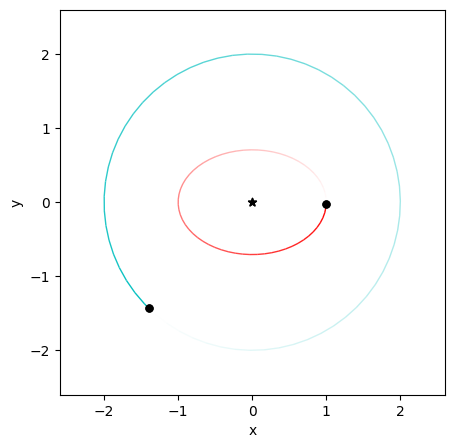

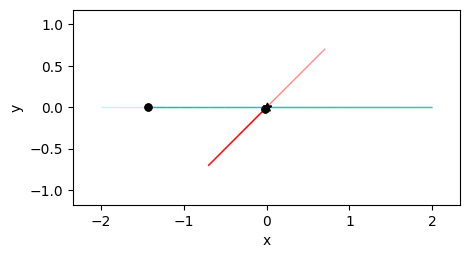

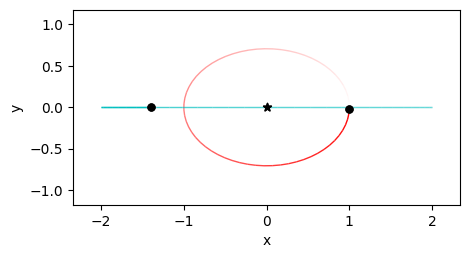

In [45]:
sim = rebound.Simulation()
sim.add(m=1.0)
sim.add(a=1, inc=np.pi/4, pomega=0.5)
sim.add(a=2)
#sim.status()
sim.integrate(100)
rebound.OrbitPlot(sim, projection="xy", color=True)
rebound.OrbitPlot(sim, projection="yz", color=True)
rebound.OrbitPlot(sim, projection="xz", color=True)

In [160]:
# Test for Period of sim.integrate()
span = 500
coor = []
v = []
#mars = sim.particles[4]
sim.integrate(1)
for i in range(span):
    sim.step()
    coor.append([sim.particles[4].x, sim.particles[4].y, sim.particles[4].z])
    v.append([sim.particles[4].vx, sim.particles[4].vy, sim.particles[4].vz])

coor = np.array(coor)
v = np.array(v)

1.385085699576499 1.380582507101124
[50] [349]
period [299]


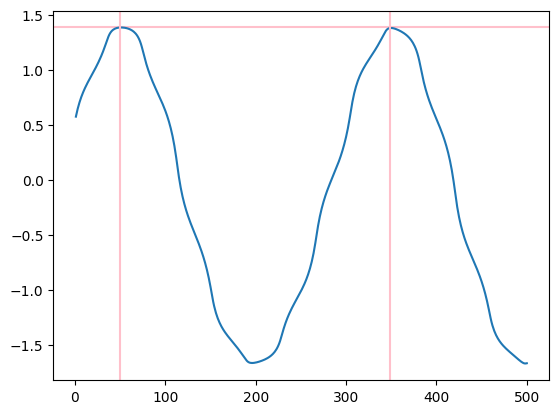

In [161]:
xm1 = np.max(coor[:,0])
xm2 = np.max(coor[200:,0])
print(xm1, xm2)
plt.axhline(y=xm1, color="pink")
loc1 = np.where(coor[:,0] == xm1)[0]
loc2 = np.where(coor[:,0] == xm2)[0]
print(loc1, loc2)

time_span = np.arange(1, span+1)
plt.plot(time_span, coor[:,0])
period = loc2-loc1
plt.axvline(x=loc1, color="pink")
plt.axvline(x=loc2, color="pink")
'''
for i in range(len(loc)):
    plt.axvline(x=loc[i]+1, color="pink")
    if i != 0:
        period += loc[i] - loc[i-1]
'''
#period /= max(len(loc)-1,1)
print("period", period)
#plt.plot(time_span, coor[:,1], color='orange')
#plt.plot(time_span, coor[:,2], color='green')

In [10]:
# Test Rotational Matrix
axis = [np.array([2,2,1]), np.array([1,2,3]), np.array([-2,4,3]), np.array([3,0,-1]), np.array([0,1,0])]
for a in axis:
    '''
    point1 = np.array([1,2,3])
    point2 = np.array([-1,0,2])
    apoint1 = rotation(a, point1)
    apoint2 = rotation(a, point2)
    '''
    m = z_rotation(a)
    relative_coor = np.array([3, 2, -1])
    result = []
    for i in range(3):
        c = 0
        for j in range(3):
            c += m[i][j] * relative_coor[j]
        result.append(c)
    
    print(result)
    
    '''
    dist = point1 - point2
    adist = apoint1 - apoint2
    
    diff1 = np.sqrt((dist**2).sum())
    diff2 = np.sqrt((adist**2).sum())
    print(diff1 - diff2, diff1, diff2)
    '''

[0.6666666666666664, -0.3333333333333336, -3.666666666666666]
[2.455235974119758, 0.9104719482395164, -2.6726124191242437]
[3.459973473447872, 1.0800530531042547, -0.9284766908852593]
[-1.8973665961010275, 2.0, -2.5298221281347035]
[3.0, -0.9999999999999999, -2.0]


In [213]:
(6.5e5/1.6e-35)**3 * 8

5.3637695312500015e+122

In [212]:
help(sim.integrate)

Help on method integrate in module rebound.simulation:

integrate(tmax, exact_finish_time=1) method of rebound.simulation.Simulation instance
    Main integration function. Call this function when you have setup your simulation and want to integrate it forward (or backward) in time. The function might be called many times to integrate the simulation in steps and create outputs in-between steps.
    
    Parameters
    ----------
    tmax : float
        The final time of your simulation. If the current time is 100, and tmax=200, then after the calling the integrate routine, the time has advanced to t=200. If tmax is larger than or equal to the current time, no integration will be performed.
    exact_finish_time: int, optional
        This argument determines whether REBOUND should try to finish at the exact time (tmax) you give it or if it is allowed to overshoot. Overshooting could happen if one starts at t=0, has a timestep of dt=10 and wants to integrate to tmax=25. With ``exact_fi

In [14]:
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.orbits(): 
    print(o)

0.0009018668853455949 0.9985061071382799 0.0
0.09813311465319363 1.9937679241781514 0.0
<rebound.Orbit instance, a=0.9999999999999991 e=2.891631544147997e-15 inc=0.0 Omega=0.0 omega=3.19823988035202 f=4.558356647731458>


In [19]:

rebound.OrbitPlotSet(sim, color=True, xlim=[-3,3], ylim=[-3,3]);


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "F:\Anaconda3\envs\simulation\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "F:\Anaconda3\envs\simulation\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "F:\Anaconda3\envs\simulation\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "F:\Anaconda3\envs\simulation\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "F:\Anaconda3\envs\sim

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [5]:
# relative phase of a star to a certain point on the surface of a star

import numpy as np
time = 1.0
omega = 1.0 # rad/s
phase1 = (omega * time) % (2*np.pi)
phase2 = np.pi/2.0
r = 1.0
relative_x = r * np.cos(phase1) * np.sin(phase2)
relative_y = r * np.sin(phase1) * np.sin(phase2)
relative_z = r * np.cos(phase2)
relative_coor = np.array([relative_x, relative_y, relative_z])
abs_coor = rotation(axis, relative_coor)
diff_coor = star_coor - abs_coor
theta = np.arctan2(diff_coor[1], diff_coor[0])
distance = np.sqrt((diff_coor**2).sum())
phi = np.arccos(diff_coor[2]/distance)

60.0


In [10]:
a = np.array([1,2,3])
print((a**2).sum())
print(a)

14
[1 2 3]


In [8]:
class Vector:
    def __init__(self, x, y, z):
        self.coordinates = np.array([x,y,z])
        
    def __neg__(self):
        return Vector(-self.coordinates[0], -self.coordinates[1], -self.coordinates[2])
    
    def __add__(self, o):
        new = self.coordinates + o.coordinates
        return Vector(new[0],new[1],new[2])
    
    def __sub__(self, o):
        new = self.coordinates - o.coordinates
        return Vector(new[0],new[1],new[2])
    
    def __truediv__(self, k):
        return Vector(self.coordinates[0]/k, self.coordinates[1]/k, self.coordinates[2]/k)
    
    def __mul__(self, k):
        return Vector(self.coordinates[0]*k, self.coordinates[1]*k, self.coordinates[2]*k)
    
    #def __mul__(k, v):
    #    return Vector(v.coordinates[0]*k, v.coordinates[1]/k, v.coordinates[2]*k)
    
    def dot(self, o):
        # inner product
        new = self.coordinates * o.coordinates
        return Vector(new[0],new[1],new[2])
    
    def cross(self, o):
        # cross product
        new_i = self.coordinates[1] * o.coordinates[2] - o.coordinates[1] * self.coordinates[2]
        new_j = self.coordinates[2] * o.coordinates[0] - o.coordinates[2] * self.coordinates[0]
        new_k = self.coordinates[0] * o.coordinates[1] - o.coordinates[0] * self.coordinates[1]
        return Vector(new_i, new_j, new_k)
    
    def __gt__(self, o):
        return self.mag2() > o.mag2()
    
    def __lt__(self, o):
        return self.mag2() < o.mag2()
    
    def __str__(self):
        string = "<" + str(self.coordinates[0]) + ", " + str(self.coordinates[1]) + ", " + str(self.coordinates[2]) + ">"
        return string
    
    def mag2(self):
        new = self.coordinates * self.coordinates
        return sum(new)
    
    def mag(self):
        return np.sqrt(self.mag2())
    
    def norm(self):
        return self / self.mag()
    
    @staticmethod
    def isint(num):
        try:
            int(num)
            return True
        except ValueError:
            return False
    
    def __getitem__(self, key):
        #key = key.split()
        if self.isint(key) and key >= 0 and key < 3:
            return self.coordinates[key]
        else:
            return False
        
    def __setitem__(self, key, value):
        if self.isint(key) and key >= 0 and key < 3:
            self.coordinates[key] = value
        else:
            return False

In [86]:
v = Vector(2,3,4)
v[1] = 5
print(v[1], v)
print(v.norm().mag())
print(3*v)

5 <2, 5, 4>
1.0


TypeError: unsupported operand type(s) for *: 'int' and 'Vector'

In [87]:
a = Vector(1,2,3)
b = -a
r = a - b
print(type(r))
print(a.dot(b))
print(a)
print(b)
print(r)
print(r.mag())
print(r.mag2())
print(r.norm())
c = a
c += r
print(c)
print(a.cross(r), r.cross(a))

<class '__main__.Vector'>
<-1, -4, -9>
<1, 2, 3>
<-1, -2, -3>
<2, 4, 6>
7.483314773547883
56
<0.2672612419124244, 0.5345224838248488, 0.8017837257372732>
<3, 6, 9>
<0, 0, 0> <0, 0, 0>


In [9]:
class PointOfMass:
    def __init__(self, pos=Vector(0.0,0.0,0.0), mass=1.0, momentum=Vector(0.0,0.0,0.0)):
        self.pos = copy.deepcopy(pos)
        self.mass = mass
        self.momentum = copy.deepcopy(momentum)
        # velocity = momentum / mass
    
    def __str__(self):
        string = "pos: {}, mass: {}, velocity: {}, momentum: {}".format(self.pos, self.mass, self.momentum/self.mass, self.momentum)
        return string
    
    def update_pos(self, pos):
        self.pos += pos
        
    def assign_pos(self, pos):
        self.pos = copy.deepcopy(pos)
    
    def get_pos(self):
        return self.pos
        
    def update_mass(self, mass):
        self.mass += mass
        
    def assign_mass(self, mass):
        self.mass = copy.deepcopy(mass)
        
    def get_mass(self):
        return self.mass
        
    def update_velocity(self, velocity):
        new_v = self.momentum / self.mass + velocity
        self.momentum = new_v * self.mass
        
    def assign_velocity(self, velocity):
        self.momentum = velocity * mass
        
    def get_velocity(self):
        return self.momentum / self.mass
        
    def update_momentum(self, momentum):
        self.momentum += momentum
        
    def assign_momentum(self, momentum):
        self.momentum = copy.deepcopy(momentum)
    
    def get_momentum(self):
        return self.momentum
        


        

In [ ]:
class Sphere(PointOfMass):
    # satellite
    def __init__(self, pos=Vector(0.0,0.0,0.0), mass=1.0, momentum=Vector(0.0,0.0,0.0),
                 radius=1.0, angular_momentum=0.0, axis=Vector(0.0,0.0,1.0)):
        super().__init__(pos, mass, momentum)
        self.radius = radius
        # inertia = 0.4 * mass * radius * radius
        self.angular_momentum = angular_momentum
        # omega = L / I
        self.axis = copy.deepcopy(axis)
    
    def __str__(self):
        string = super().__str__()
        string += ", radius: {}".format(self.radius)
        return string
    
    def update_radius(self, radius):
        self.radius += radius
    
    def assign_radius(self, radius):
        self.radius = radius
        
    def get_radius(self):
        return self.radius
    
    def update_angular_momentum(self, angular_momentum):
        self.angular_momentum += angular_momentum
    
    def assign_angular_momentum(self, angular_momentum):
        self.angular_momentum = copy.deepcopy(angular_momentum)
        
    def get_angular_momentum(self):
        return self.angular_momentum
    
    def update_angular_velocity(self, angular_velocity):
        self.angular_momentum += angular_velocity * 0.4 * mass * radius * radius
    
    def assign_angular_velocity(self, angular_velocity):
        self.angular_momentum = 0.4 * mass * radius * radius * angular_velocity
        
    def get_angular_velocity(self):
        return self.angular_momentum / (0.4 * mass * radius * radius)
    
    def get_surface_velocity(self, phi):
        r = self.radius * np.sin(phi)
        r_vec = 
        return 
    
    

class Planet(Sphere):
    def __init__(self, radius=1.0, pos=Vector(0.0,0.0,0.0), mass=1.0, momentum=Vector(0.0,0.0,0.0),
                 radius=1.0, angular_momentum=0.0, axis=Vector(0.0,0.0,1.0)):
        super().__init__(pos, mass, momentum, radius, angular_momentum, axis)
        self.satellites = []
        self.n_satellite = 0
    
    def __str__(self):
        string = super().__str__()
        string += ", number of satellites: {}".format(self.n_satellite)
        return string
    
    def add_satellite(self, satellite):
        idx = 0
        for i in range(self.n_satellite):
            if self.satellites[i].get_mass() > satellite.get_mass():
                break
        self.satellites.insert(i, copy.deepcopy(satellite))
        self.n_satellite += 1
        
    def remove_satellite(self, idx):
        if idx < self.n_satellite:
            self.satellites.pop(idx)
        self.n_satellite -= 1
    
    def get_satellites(self, idx=-1):
        if idx == -1:
            return tuple(self.satellites)
        if idx < self.n_satellite:
            return self.satellites[i]
        
    def get_num_satellite(self):
        return n_satellite


class Star(Planet):
    def __init__(self, radius=1.0, pos=Vector(0.0,0.0,0.0), mass=1.0, momentum=Vector(0.0,0.0,0.0),
                 radius=1.0, angular_momentum=0.0, axis=Vector(0.0,0.0,1.0)):
        super().__init__(pos, mass, momentum, radius, angular_momentum, axis)
        self.luminosity = 1.0
        # satellites of a Star are Planets
    
    def __str__(self):
        string = super().__str__()
        string = " ".join(string.split()[:-1])
        string += ", number of planets: {}".format(self.n_satellite)
        return string
        

In [12]:
v = Vector(1,2,3)
p = PointOfMass(momentum=v)
v[0] = 5
print(p.get_velocity())
print(np.sin(3))

<5.0, 2.0, 3.0>
0.1411200080598672


In [ ]:

        
class Cube(PointOfMass):
    def __init__(self, dim=[1.0,1.0,1.0], pos=Vector(0.0,0.0,0.0), mass=1.0, momentum=Vector(0.0,0.0,0.0)):
        super().__init__(pos, mass, momentum)
        self.dim = dim # (length, width, height)
    
    def __str__(self):
        string = super().__str__()
        string += ", dim: ({}, {}, {})".format(self.dim[0], self.dim[1], self.dim[2])
    
    def update_dim(self, dim):
        self.dim[0] += dim[0]
        self.dim[1] += dim[1]
        self.dim[2] += dim[2]
    
    def assign_dim(self, dim):
        self.dim[0] = dim[0]
        self.dim[1] = dim[1]
        self.dim[2] = dim[2]
    
    def get_dim(self):
        return self.dim
    
    def update_length(self, length):
        self.dim[0] += length
    
    def assign_length(self, length):
        self.dim[0] = length
        
    def update_width(self, width):
        self.dim[1] += width
    
    def assign_width(self, width):
        self.dim[1] = width
        
    def update_height(self, height):
        self.dim[2] += height
    
    def assign_height(self, height):
        self.dim[2] = height

In [89]:
x = 1e11
mass = 1e30
v = 1e4
G = 6.7e-11
#scene.forward = vec(0,-.3,-1)

star1 = Sphere(pos=Vector(x,0,0), radius=1e6, mass=mass)
star1.momentum = Vector(-1,1,1).norm() * v * star1.mass

star2 = Sphere(pos=Vector(-x,0,0), radius=1e6, mass=mass)
star2.momentum = Vector(1,-2,1).norm() * v * star2.mass

star3 = Sphere(pos=Vector(0,np.sqrt(6)*x/2,np.sqrt(6)*x/2), radius=1e6, mass=mass)
star3.momentum = Vector(1,1,-2).norm() * v * star3.mass

dt = 1e1
cycle = 100000
log_rate = 200
i = 0
while i < cycle:
    r12 = star2.pos - star1.pos
    r23 = star3.pos - star2.pos
    r31 = star1.pos - star3.pos
    F12 = r12.norm() * G * star1.mass * star2.mass / r12.mag2()
    F23 = r23.norm() * G * star2.mass * star3.mass / r23.mag2()
    F31 = r31.norm() * G * star3.mass * star1.mass / r31.mag2()
    star1.momentum += F12*dt - F31*dt
    star2.momentum += F23*dt - F12*dt
    star3.momentum += F31*dt - F23*dt
    star1.pos += (star1.get_velocity()) * dt
    star2.pos += (star2.get_velocity()) * dt
    star3.pos += (star3.get_velocity()) * dt
    # if (i % log_rate == 0)
        # log
    i += 1

KeyboardInterrupt: 

In [2]:
from vpython import *
from time import *
scene = canvas()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Web VPython 3.2
x = 1e11
mass = 1e30
v = 1e4
G = 6.7e-11
scene.forward = vec(0,-.3,-1)

star1 = sphere(pos=vector(x,0,0), radius=1e6, color=color.red, 
                make_trail=True, retain=40)
star1.mass = mass
star1.p = norm(vector(-1,1,1)) * v * star1.mass

star2 = sphere(pos=vector(-x,0,0), radius=1e6, color=color.yellow,
                make_trail=True, retain=40)
star2.mass = mass
star2.p = norm(vector(1,-2,1)) * v * star2.mass

star3 = sphere(pos=vector(0,sqrt(6)*x/2,sqrt(6)*x/2), radius=1e6, color=color.orange,
                make_trail=True, retain=40)
star3.mass = mass
star3.p = norm(vector(1,1,-2)) * v * star3.mass

dt = 1e-1
while True:
    rate(20000000)
    r12 = star2.pos - star1.pos
    r23 = star3.pos - star2.pos
    r31 = star1.pos - star3.pos
    F12 = G * star1.mass * star2.mass * norm(r12) / mag2(r12)
    F23 = G * star2.mass * star3.mass * norm(r23) / mag2(r23)
    F31 = G * star3.mass * star1.mass * norm(r31) / mag2(r31)
    star1.p += F12*dt - F31*dt
    star2.p += F23*dt - F12*dt
    star3.p += F31*dt - F23*dt
    star1.pos += (star1.p/star1.mass) * dt
    star2.pos += (star2.p/star2.mass) * dt
    star3.pos += (star3.p/star3.mass) * dt

In [3]:
a = vector(1,2,3)
b = -a
r = a - b
print(a)
print(b)
print(r)
print(mag(r))
print(mag2(r))
c = a
c += r
print(c)

<1, 2, 3>
<-1, -2, -3>
<2, 4, 6>
7.483314773547883
56.0
<3, 6, 9>


In [4]:
print(norm(r))

<0.267261, 0.534522, 0.801784>


In [6]:
print(a*.dot(b))

SyntaxError: invalid syntax (1953647030.py, line 1)

In [12]:
x = np.array([1,2,-3])
x*=-1

print(x)

[-1 -2  3]


In [1]:
import vpython

<IPython.core.display.Javascript object>

In [2]:
help(vpython)

Help on package vpython:

NAME
    vpython

PACKAGE CONTENTS
    _notebook_helpers
    _vector_import_helper
    cyvector
    gs_version
    no_notebook
    qtbrowser
    rate_control
    shapespaths
    vector
    vpython
    with_notebook

FUNCTIONS
    acos(x, /)
        Return the arc cosine (measured in radians) of x.
        
        The result is between 0 and pi.
    
    acosh(x, /)
        Return the inverse hyperbolic cosine of x.
    
    arange(...)
        arange([start,] stop[, step,], dtype=None, *, device=None, like=None)
        
        Return evenly spaced values within a given interval.
        
        ``arange`` can be called with a varying number of positional arguments:
        
        * ``arange(stop)``: Values are generated within the half-open interval
          ``[0, stop)`` (in other words, the interval including `start` but
          excluding `stop`).
        * ``arange(start, stop)``: Values are generated within the half-open
          interval ``[star